# 1 ) RSA encryption

**RSA encryption** is an asymetric cryptosystem created by three MIT searchers, Ronald **R**ivest, Adi **S**hamir and Leonard **A**dleman in 1977. They were looking for a way to proove that public-key cryptography was flawed. They finally found a system which is still used nowadays for confidential communications and safe authentification online.   

## I - The cryptosystem deciphered

### How does it works ?

The cryptosystem is based on arithmetical properties such as Fermat's Little Theorem, Gauss theorem or modulus computations, and an efficient combinaisons of fast algorithms including the Euclid's Algorithm and the Fast Exponentiation algorithm. It also uses somes properties of prime numbers, showing that these numbers are always a powerful tool to use in cryptography since a lot of problems about them that are still unsolve (Goldbach conjecture for instance).

By beeing a public-key cryptosystem, the RSA encryption are using three keys : 
- __two public keys__ to encrypt called $n$ and $e$ ($n$ is also use to decrypt) known by absolutely everybody
- __one private key__ to decrypt, $d$ which have to be secret. 

To encrypt and decrypt, the function used is the modular exponentiation.


### Application : Alice and Bob (and Eve)

Now let's tell the story of Alice and Bob who want to talk discreetly to each other online. They know that, Eve, a spy, are listening to them. They have to cipher their messages before sending them. That's why by using RSA encryption, Alice who wants to receive Bob's secret message creates the required keys, shares the public keys $(n,e)$ to Bob (and indirectly Eve since she's spying) but keeps secret the private key $d$. Then, Bob encrypts his message $M$ with $n$ and $e$ : $$M^{e}\equiv C\mod{n}$$

And once Alice receives $C$ the ciphered message $M$, she does the reverse computation with her private key: $$C^{d}\equiv M\mod{n}$$

As Eve doesn't know the secret key to make the same computation as Alice, she can't read the message.

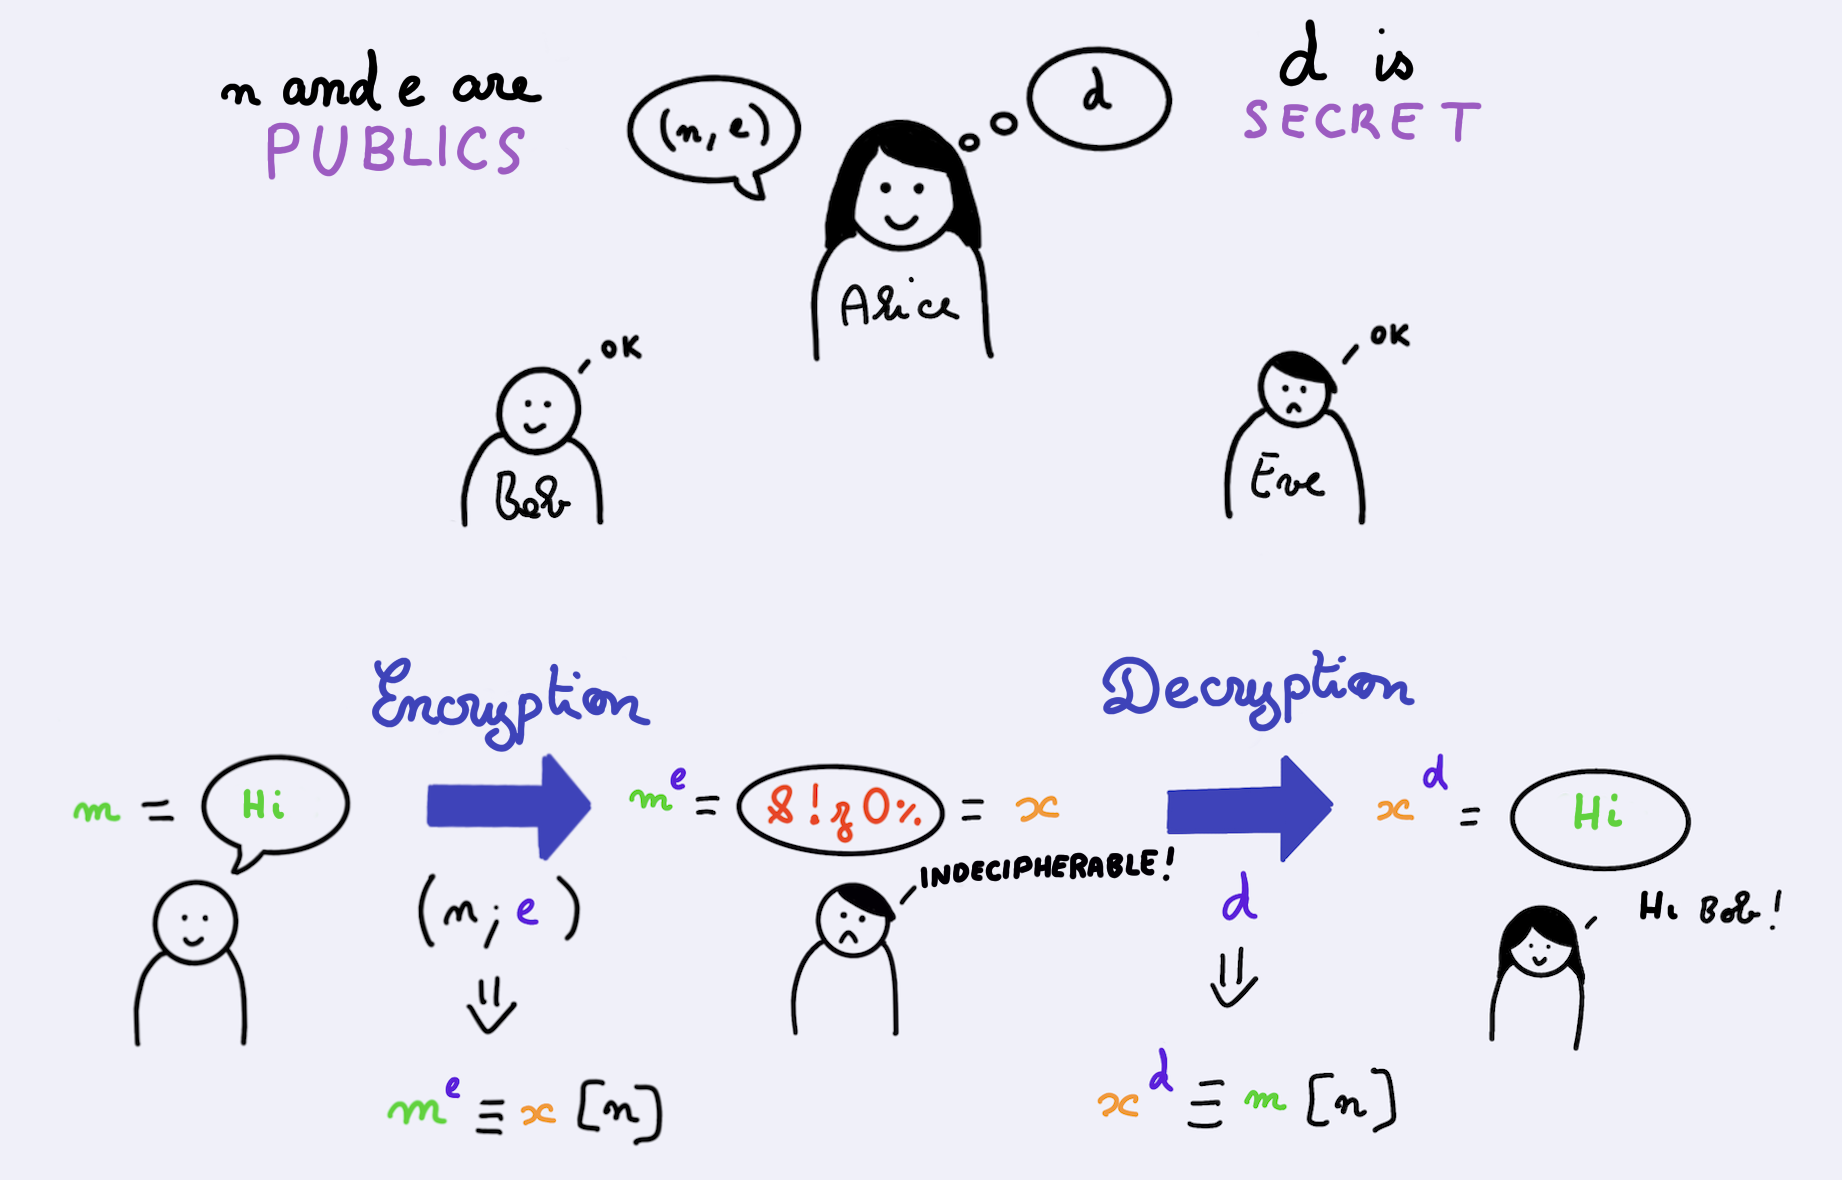


### But how do you compute the keys ?

In order to create the required key to cipher a message, we first need to *generate two -large- prime numbers* we can called $p$ and $q$ which the product gives the first encryption/decryption key $n$. $$n = p \times q  \text{ ($p$ and $q$ are prime)}$$

Then, we need to compute a useful number $\phi(n)$, the Euler's phi function which gives the number of coprime numbers with $n$. Computing this function for $p$ a prime number is easily since a prime number is coprime with $\forall a < p-1$. So, we have : $$\phi(n) = \phi(p\times q) = (p-1)(q-1)$$

We must get the second public key $e$, an integer which have to be coprime with $\phi(n)$ and less than $\phi(n)$. It's in this step that the *Euclid's algorithm* is used. $$gdc(\phi(n),e) = 1$$

Finally, all that's left to do is to compute $d$, the secret and decryption key d, the inverse of $e\mod n$. Its means that $\exists (d,k) \in \mathbb{Z^2} $ such that $ed+k\phi(n) = 1$. We recognize the Bézout's identity which also implies to use the *Extended Euclid's algorithm* to solve $$ed\equiv 1 \mod \phi(n)$$ 

We did it ! We can encrypt and decrypt quickly thanks to *Fast Exponentiation algorithm*.


## II - RSA encryption program

The best way to show what going on during the message transmission between Alice and you is to test by yourself with the following python program :

*Note*: In real life, the size of the keys used and recommended for optimal security are at least 2048 bits to be secured.

First we need to implement some functions including Euclid Extended algorithm:

In [13]:
import math


def euclidExtended(a, b):
    """Apply the Extended Euclid algorithm.

    Especialy to find the inverse of a mod b (or b mod a)

    Parameters
    ----------
    a : int
        phi(n) or e
    b : int
        phi(n) or e

    Returns
    -------
    int
        u or v according to the choice of a and b.
    """
    (u, v, new_u, new_v) = (1, 0, 0, 1)
    (B, A) = (b, a)

    while b != 0:
        (q, r) = divmod(a, b)  # (y // b, y % b)
        (a, b) = (b, r)
        (u, v, new_u, new_v) = (new_u, new_v, u - q * new_u, v - q * new_v)

    if B < A:
        return v % A
    else:
        return u % B


def string_to_int(x):
    """To convert a string to an int

    Parameters
    ----------
    x : str
        the string you want to convert

    Returns
    -------
    to_int : int
        the string converted
    """
    to_int = 0
    for i in reversed(range(len(x))):
        to_int = int(ord(x[i])) * pow(2, (8 * i)) + to_int
    return to_int


def int_to_string(x):
    """To convert an int to a string

    Parameters
    ----------
    x : int
        the integer you want to convert

    Returns
    -------
    to_int : str
        the interge converted
    """
    text = ''
    tmp1 = x
    while tmp1 > 0:
        res = tmp1 % (pow(2, 8))
        tmp1 = (tmp1 - res) // (pow(2, 8))
        text = text + chr(res)
    return text


def char10_message():
    """Asks the user for a string of 10 characters max

    Parameters
    ----------
    None

    Returns
    -------
    message : str
        user's message
    """
    message = input("Enter a maximum 10-character-long message :")
    while (len(message) > 11):
        message = input("Too long ! Enter a maximum 10-character-long message :")
    return (message)

Then, Alice can create the RSA encryption keys

In [14]:
# Here are the required key to use RSA encryption
p = 2010942103422233250095259520183  # p prime number
q = 3503815992030544427564583819137  # q prime number
n = p * q  # n public key and modulo
phi = ((p - 1) * (q - 1)) // math.gcd(p - 1, q - 1)
e = 17  # e exponant public key
d = euclidExtended(phi, e)  # exponant private key

print((n,e,d)) # Print the keys

(7045971101018361865452458056705466050012694359105076273142071, 17, 207234444147598878395660531079410332115212987689041659700081)


Let's take a look to a safe message transmission. You'll be asking to send a message to Alice the same way Bob did to be sure that Eve can not read it.

In [15]:
print("Alice sent you her public keys :")
print("n =", n)
print("e =", e)
print("Now you could send her a message")
secret_message = char10_message()

Alice sent you her public keys :
n = 7045971101018361865452458056705466050012694359105076273142071
e = 17
Now you could send her a message


KeyboardInterrupt: Interrupted by user

Ok, it's time to cipher your precious words. We are going to manipulate numbers not characters so your secret message will be first converted to the convenient type and then raise to the power e modulo n.

In [ ]:
print("Here is the int version of your message \"", secret_message ,"\":")
b_secret_message = string_to_int(secret_message)
print(b_secret_message)
print("Here is your encrypted message : ")
encrypted_message = pow(b_secret_message, e, n)
print(encrypted_message)

After the sending, Alice wants to know your message. Thanks to her private and secret key d, she decrypts your message by using the same function as you.

In [ ]:
print("Alice decrypts your message with her private key :\n", encrypted_message, "\n and she reads :")
decrypted_message = int_to_string(pow(encrypted_message, d, n))
print("Alice : \"You sent me: ", decrypted_message,"\"")

## III - Correctness of RSA encryption algorithm 

### Fast Powering Algorithm


Used to cipher and decipher, it is useful to demonstrate its correctness.

In [3]:
def fast_powering(a,n):
    (A, N, R) = (a, n, 1)
    
    while N > 0:
        if N%2 == 0:
            A = A * A
            N = N // 2
        else:
            R = R * A
            N = N - 1
    
    return R

#### Convergence

We want to proove that the `fast_powering(a,b)` algorithm is correct. To do this, we must find a **loop variant** to show that the program will end.

As we have $n \geq N_n > 0$ and $N_{n+1}$ =  $\left \{\begin{array}{rcl}N_n / 2 \text{ if $N_n$ is even} \\N_n-1 \text{ if $N_n$ is odd} \end{array} \right.$

Then, $(N_n)$ is a strictly decreasing sequence of integers bounded by 0 whenever its parity. Therefore, $\exists m \in \mathbb{N}$ where we get $N_m = 0$, the step when the while loop terminates.


#### Correctness

As we know that the program converges, we want to show that it compute an integer raise to the power of n. So, we need to demonstrate by induction the following property (the **loop invariant**) for all $k \in \mathbb{N}$: $$\mathcal{P}(k) : a^n = A_{k}^{N_k} \times R_k$$

- $\mathcal{P}(0) = A_{0}^{N_0} \times R_0 = a^n \times 1 = a^n$ and $N_0 = a^n$. $\mathcal{P}(0)$ is true.
- Assuming that $\mathcal{P}(k)$ is true $\forall k > 0$. Let's show that $\mathcal{P}(k) \Rightarrow \mathcal{P}(k+1)$

$$\mathcal{P}(k+1) : A_{k+1}^{N_{k+1}} \times R_{k+1}$$

Here, we split the problem in two cases :
* $N_k$ is odd : $\left \{\begin{array}{rcl} A_{k+1}&=&A_{k} \\ R_{k+1}&=&R_{k}\times A_{k}\\ N_{k+1} &=& N_{k}-1\end{array} \right.$ So, $ A_{k+1}^{N_{k+1}} \times R_{k+1} = A_{k}^{N_{k}-1} \times R_{k} \times A_{k} = A_{k}^{N_{k}} A_{k}^{-1} \times R_{k} \times A_{k} = \underbrace{A_{k}^{N_k} \times R_k = a^n}_{\text{induction hypothesis}}$

* $N_k$ is even : $\left \{\begin{array}{rcl} A_{k+1}&=&(A_{k})^2 \\ R_{k+1}&=&R_{k}\\ N_{k+1} &=& N_{k}/2\end{array} \right.$ So, $ A_{k+1}^{N_{k+1}} \times R_{k+1} = ((A_{k})^2)^{N_{k}/2} \times R_{k} = \underbrace{A_{k}^{N_k} \times R_k = a^n}_{\text{induction hypothesis}}$

By induction, $\mathcal{P}(k) : a^n = A_{k}^{N_k} \times R_k$ is true $\forall k \in \mathbb{N}$

In conclusion, as $\mathcal{P}(k)$ is a loop invariant, it implies that $\mathcal{P}(m)$ is true. Then, in the last iteration of the while loop, the $m^{th}$ one we have :

$$a^m = A_{m}^{N_m} \times R_m = \underbrace{A_{m}^{0}}_{\text{since $N_m = 0$}} \times R_m = R_m$$

And $R_m$ is the returned data of the program. The fast powering algorithm is correct.

## IV - Complexity

Let's take a look in how effective RSA cryptosystem is in terms of algorithmic complexity.

In [5]:
def gcd(a,b):
    while b != 0:
        a, b = b, a%b
    return a

# We're going to study this one :
def r_gcd(a,b):
    if b == 0:
        return a
    else:
        return r_gcd(b, a%b)

#### Worst case scenario and Fibonacci sequence

It turns out that Fibonacci numbers are useful for studying the complexity of the *Euclid's algorithm*.

__Fibonacci sequence__:
$$\left \{\begin{array}{rcl}F_{0} = 0, F_{1} = 1 \\ F_{n+2} = F_{n+1} + F_{n} \end{array} \right. \text{ and } F_n = \frac{\Phi^n - \hat{\Phi}^n}{\sqrt{5}} = \frac{\Phi^n + (-1)^{n-1}\frac{1}{\Phi^n}}{\sqrt{5}} \text{ with }\Phi = \frac{1 + \sqrt{5}}{2}, \hat{\Phi} = \frac{1 - \sqrt{5}}{2}$$

As usual, we want to compute the running time function in the worst case scenario, when the algorithm is called the maximum of times. Lamé's theorem provides us some useful indication in this direction.

__Lamé's theorem__: Let be $a$ and $b$ such that $a > b > 0$. If Euclid algorithm takes n iterations to compute $gcd(a,b)$. Then, $$a \geq F_{n+2} \text{ and } b \geq F_{n+1}$$

The maximum iteration case is $n$ recursive calls which means $b = F_{n}$ and $a = F_{n+1}$. As $a$ and $b$ are two successive terms of the Fibonacci sequence, in the Euclid division used in this algorithm $a = bq + r$, $q$ always be greater or equal than 1. We can then identify :

$$\underbrace{F_{n+2}}_a = \underbrace{F_{n+1}}_b \times \underbrace{1}_{q} + \underbrace{F_{n}}_{r} \text{ with } \underbrace{F_{n+2} > F_{n+1} > F_n > 0}_{a > b > r > 0}$$ 

If worst case scenario means $b = F_n$ then :

$$b = F_n$$
$$b = \frac{\Phi^n + (-1)^{n-1}\frac{1}{\Phi^n} \Phi^n}{\sqrt{5}}$$
$$b \geq \frac{\Phi^n - \frac{1}{\Phi^n}}{\sqrt{5}}$$
$$b \geq \frac{\Phi^n (1 - \frac{1}{\Phi^{2n}})}{\sqrt{5}}$$
$$ln(b) \geq nln(\Phi) + ln(1 - \frac{1}{\Phi^{2n}}) - ln(\sqrt{5})$$
$$- nln(\Phi) \geq - ln(b) + ln(1 - \frac{1}{\Phi^{2n}}) - ln(\sqrt{5})$$
$$n < \frac{1}{ln(\Phi)} (ln(b) - ln(1 - \frac{1}{\Phi^{2n}}) + ln(\sqrt{5}))$$

And approximation gives us : $n < 2,0781ln(b) + 1$ which means the complexity of *Euclid's algorithm* is in $\mathcal{O}(ln(b))$

#### Let's verify it thanks to an experiment

In [1]:
# Print the Fibonnaci numbers from 0 to n
def Fibonnaci_sequence(n):
    F = [0,1]
    
    if n == 0:
        return 0
    elif n == 1:
        return F
    else:
        for i in range(2,n+1):
            F.append(F[i-2]+F[i-1])

        return F

In [9]:
# Library needed
import math
import random
import numpy as np
import matplotlib.pyplot as plt
import timeit
from tqdm import tqdm

In [10]:
# Here are the functions used to plot efficiently our datas 
def benchmark(function_list,points,arg_provider,repeat:int = 10,warm=False,verbose_level=1):
    """ Record time taken by function to process argument given by `arg_provider` depending on the size of the problem/point.
    
    Parameters 
    ----------
    function_list : list of function
                    List of function to benchmark.
    points : list of int
             list of point reprensenting where to evaluate the functions or the size of the problem to give to the functions
    arg_provider : function, lambda or list of them
                   (list of) function(s) which take an integer in input and return a tuple or an array of args to get processed by the functions of `function_list`
                   if `arg_profider` is a unique function (or lambda) then all of the function in `function_list` will recieve the same arguments in the position
                   if `arg_profider` is a list then `len(arg_profider)` must be equal to `len(function_list)` each provider in the list will be called for the 
                   function of the same indice in `function_list`
    repeat : int
             number of time a measure is repeated for better accuracy
    warm : bool
           if `True` then a dummy function equal to the first function of `function_list` is runned (with correct argument) before other functions and not taken in account for final data
    verbose_level : int
                    define how much information about current computation will be displayed
                    1+ : a progress bar about general advencement on evalating functions on earch points
                    2+ : add progress bars about each repeatition of the diffrent functions.
    
    Returns
    ----------
    
    """
    
    def dumy_provider(n):
        return n
    
    def warm_fun(*args): # warming dummy function
        return function_list[1](*args)
    
    if(warm):
        function_list.insert(0,warm_fun)
        
        if isinstance(arg_provider,list) :
            arg_provider.insert(0,arg_provider[0])
        elif isinstance(arg_provider,tuple) :
            arg_provider = (arg_provider[0],*arg_provider)
        
    data={fun.__name__:{"y":[0]*len(points),"x":points} for fun in function_list}
    
    if verbose_level >0:
        pt_it = enumerate(tqdm(points,desc = "Evaluating function on given problem sizes/points "))
    else:
        pt_it = enumerate(points)
    
    for (i,v) in pt_it:
        
        if verbose_level > 1:
            rp_it = tqdm(range(repeat),desc="Reapeting mesure ")
        else :
            rp_it = range(repeat)
        
        for _ in rp_it :
            
            
            if isinstance(arg_provider,(list,tuple)):
                args = [arg_provider[j](v) for j in range(len(arg_provider))]
                
                for (j,fun) in enumerate(function_list):
                    data[fun.__name__]["y"][i] += timeit.timeit(lambda: fun(*(args[j])), number=1)
            else:
                args = arg_provider(v)
                
                for fun in function_list:
                    data[fun.__name__]["y"][i] += timeit.timeit(lambda: fun(*args), number=1)
            
        for fun in function_list:
            data[fun.__name__]["y"][i] /= repeat
    
    if(warm):
        function_list.remove(warm_fun)
        del data["warm_fun"]
        if isinstance(arg_provider,list) :
            del arg_provider[0]
    
    return data

def plot(data,transform=None,format=None):
    """ Plot all data to current plot
    
    Parameters
    ----------
    data : dict
           will have to be of form {curve_name_1:{x:[x1,x2..],y:[y1,y2..]},curve_name_2...}
           of optional `format` field can be added to each curve neasted dict
    transform : function or None
           plot transforming function called between the addition of two data set to the plot if provided. Must return a plotable object
    format : str or None
           formating to give by default for all curves creation. Will be overriden by the `format` key if present in curve's neasted dict
    Returns
    ---------
    last used plot.
    """
    
    plot = plt
    
    for name in data.keys():
        if "format" in data[name]:
            plot.plot(data[name]["x"],data[name]["y"],data[name][format],label = name)
        elif format != None:
            plot.plot(data[name]["x"],data[name]["y"],format,label = name)
        else:
            plot.plot(data[name]["x"],data[name]["y"],label = name)
        
        if (transform != None):
            plot = transform(plot)
    
    plot.legend()
    return plot

def linspace(min:int,max:int,number:int):
    return [int(x) for x in np.linspace(min,max,number)]

Evaluating function on given problem sizes/points : 100%|██████████| 46/46 [00:05<00:00,  8.88it/s]


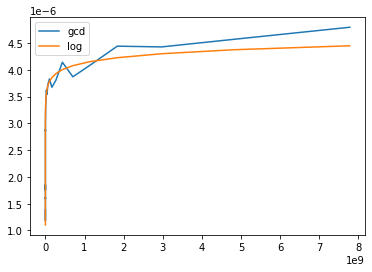

In [19]:
Fn = Fibonnaci_sequence(100)
X = list(range(4,50))
data = benchmark([gcd],X,lambda n:Fn[n-1:n+1],1000,warm=True)
X = [Fn[i] for i in X]
data["gcd"]["x"] = X
log = [math.log(x) for x in X]
fit = np.polyfit(log,data["gcd"]["y"],1)
data["log"]= {"x" : X,"y":np.multiply(fit[0],log) + fit[1]}
plot(data).show()

We've got a ln(n)-style curve which verifies the theorical class of complexity of Euclid's algorithm. 

It's also important to point out that the complexity of the `fast_powering(a,b)` algorithm is in $\mathcal{O}(nlog(n))$, $n$ the size of the exponent and the *extended Euclid algorithm* is in $\mathcal{O}(ln(b))$, $b$ the smallest input of `extendedEuclid(a,b)`.

## V - RSA breaker

Now we want to know why RSA encryption is secure. Especialy, how we can breaker the system down thanks to classical algorithm. 

To decode a cyphered message by the private key $d$, we needs to compute it the same way the owner of the key did. Recall that this is the inverse of $e$ modulo $\phi(n)$. However, if we know that the public key e, we don't know $\phi(n)$ which is the product $(p-1)\times(q-1)$, $p$ and $q$ are the prime numbers factor of n. So, to obtain $\phi(n)$, we *just* have to factorize $n$ the other public key we know. However, factoring a large number is much more complex than multiplying it. Let's see this.

### Naïve factorization

Naive factorization consists in checking all the numbers less than $\sqrt{n}$ and in stopping if it's a prime factor of $n$.

In [36]:
import math

def naive_factorization(n):
    
    # we can avoid the test for even numbers
    if n % 2 == 0:
        #print("n is even")
        return 2
    
    i = 3
    # Test each odd number less than sqrt of n
    while i < math.sqrt(n):
        # We find a factor 
        if n % i == 0:
            return i
        i = i + 2
        
a = 35467
p = pollard_rho(a)
q = a//p

print("p =", p, "\nq =", q)
print("p*q= ",p*q)

p = 29 
q = 1223
p*q=  35467


We can easily see that the naive algorithm has a complexity in $\mathcal{O}(\sqrt{n})$ which is in term of the key lenght $k$ in $\mathcal{O}(2^{\frac{k}{2}})$. It's an exponential order complexity so the time of $n$'s factorization will be too long to compute if it a large number.

### Pollard rho's factorization

Pollard's rho algorithm is faster for factorization. Find by John Pollard in 1975, it allows us to factorize some large numbers but it's a heuristic algorithm. In other words, we can't be sure that the solution given by the algorithm is good.

In [22]:
import random
import math

def pollard_rho(n):
    i = 0
    x = []
    x.append(random.randint(0, n-1))
    y = x[0]
    k = 2
    
    while(True):
        i = i + 1
        x.insert(i,(x[i-1] ** 2 - 1) % n) 
        d = math.gcd(y - x[i], n)
        if d != 1 and d != n:
            return d
        if i == k:
            y = x[i]
            k = 2 * k

a = 35467
p = pollard_rho(a)
q = a//p

print("p =", p, "\nq =", q)
print("p*q= ",p*q)

p = 29 
q = 1223
p*q=  35467


#### Birthday paradox

In order to understand the algorithm, we must look at the *Birthday paradox*, which will justify that the complexity of the algorithm is $\mathcal{O}(n^{1/4})$.

It’s a paradox because the fact that will be said is strange, counter-intuitive, but true : « In a group of 23 people, the probability of a shared birthday exceeds 50%, while a group of 70 has a 99.9% chance of a shared birthday ». We could possibly thinking that we need to have more than only 23 people to find a person that shares the same birthday has you but probabilities don’t work like a linear function. 

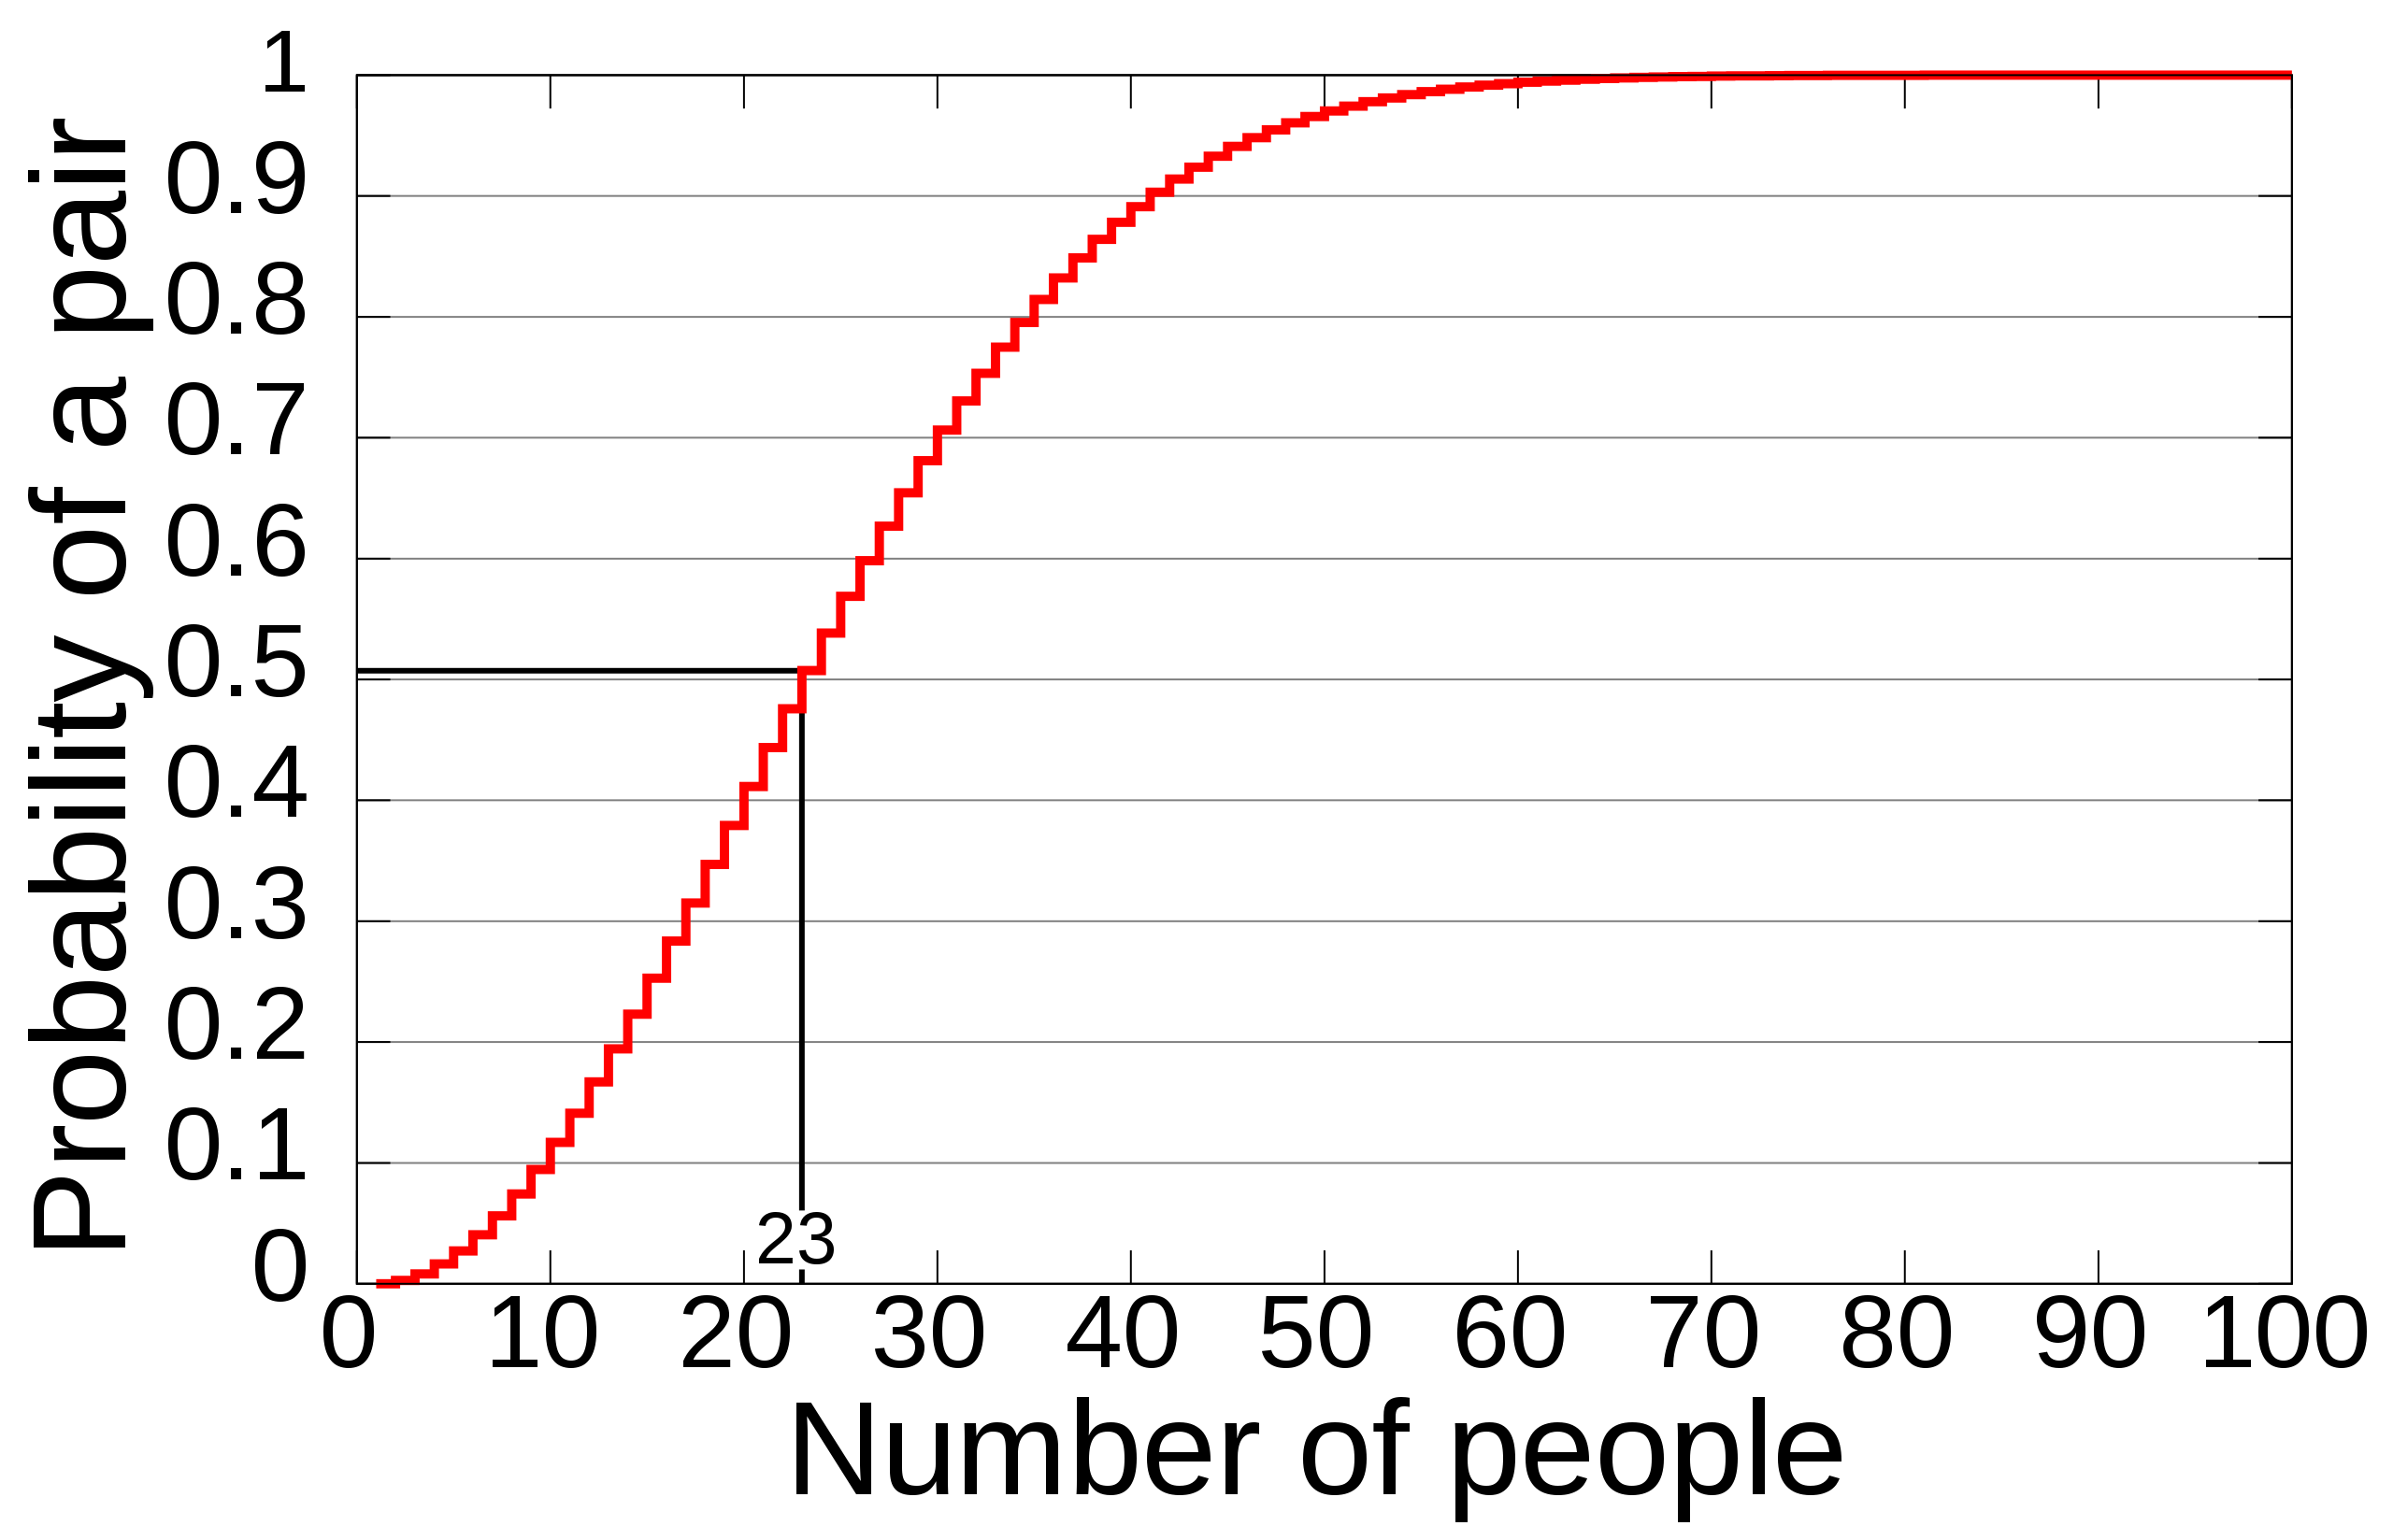

But what is the link with Pollard rho factorization? It actually looked for a collision that we can assimilate to the fact of gathering $n$ people and asking if any two among them share the same birthday for the paradox and whose cost was estimated at $\mathcal{O}(n^{1/4})$. The sought collision is:

There's j numbers $\in x_1,\ldots, x_j$ uniformly at random between $2$ and $n-1$ such that

$$x_i \equiv x_j \mod p$$ where $p$ is a (prime) factor of $n$

When we generate random numbers $x_1,\ldots,x_j$, we will test if  $gcd(x_i- x_k, n) > 1$. It means we ask if $x_i - x_k$ and $n$ have a non-trivial common factor. Then, if $gcd( x_i - x_k , n )$, we have $gcd(x_i - x_k, n) = d$ is a factor of $n$ ($d$ is $p$ or $q$).

### Comparation

Now let's compare the naive and Pollard rho's algorithm with some experiences :

In [ ]:
X = list(range(1,101))
data = benchmark([naive_factorization,pollard_rho], X, lambda n:[X[n]], 10, warm=False)
plot(data).show()

*talking about their shapes*